## Storm Incidence

### Have the frequency and severity of storms increased since the good old days?

It seems as if the number of very notable storms has increased in recent decades.  The disasters seem to be more frequent, harder hitting with a greater cost in property and lives.  Is this true or is recency bias sneaking up on me?  How many storms can I expect to see in the next five years?  If there really are more storms, when did that change occur.

Scientific restatement of the question.  Reference Data set source.  Provide specific goal such as a predictive model, hypothesis testing.  

### Source Data
I downloaded storm data going back to 1950 from the National Atmospheric and Oceanic Organization.  It covers intensity of wind, property and crop damage estimates, as well as measures off deaths and injuries related to storms.  
<https://www.ncdc.noaa.gov/stormevents/ftp.jsp>
<https://fred.stlouisfed.org/series/GDP>
<http://www.multpl.com/united-states-population/table>


### Confouding factors
It appears that the collection of data at NOAA changed artound 1993.  The number of observations increased dramatically.  However, it appears that the most significan t change was an increase in the recording of less dramatic storms.  While the details of these storms may be interesting, they are not poignant at this point.  I focused on higher severity storms.  Go into cutoff criteria, fitting damage data to GDP basis.

### Test
I will test whether the number of severe storms over the second half of the data set, from 1984 to 2017, is significantly different than the prior period from 1950 to 1983.  I will test across 3 metrics to capture slightly different aspects of of the general question.  First, I will measure the number of storms with damage above a specific criteria adjusted by by real economic growth and inflation.  Second, the number of storms with winds speeds in the highest quartile of intensity.  Third, I will measure aggregate deaths both adjusted and unadjusted by population.  ... if I have time.

### H0
My null hypothesis is that the number of severe storms in the earlier and later periods come from the same population and that there is no statistical difference between the two epochs.

### H1
My alternate hypothesis is that there is a difference in the number of severe storms between the two periods.  

### Test Criteria
My intuition is that storm incidence has increased, but the two sided test is more rigorous and given the confounding factors in this analysis, rigor over the test is important.  I will run a poisson based test to determine if the counts over the time periods are likely to have come from the same population with a confidence level of 95%.  Thus, if the generated p-value is below 2.5%, I will reject the null hypothesis.

________________________________________________________________________________

### Update of Test
After further EDA with the data and speaking to an expert, I determined that it was viewed that a large change in climate data had occurred in the mid-19990s, as well as a mandated change in the type of storms recorded.  Therefore I determed to test an additional time period across the three metrics.  I will be looking at the last decade, 2008-2017 vs the remainder of available data as a test of *recent* storm metrics.  This also better captures the nature of the original question.

In [38]:
run eda_automation.py

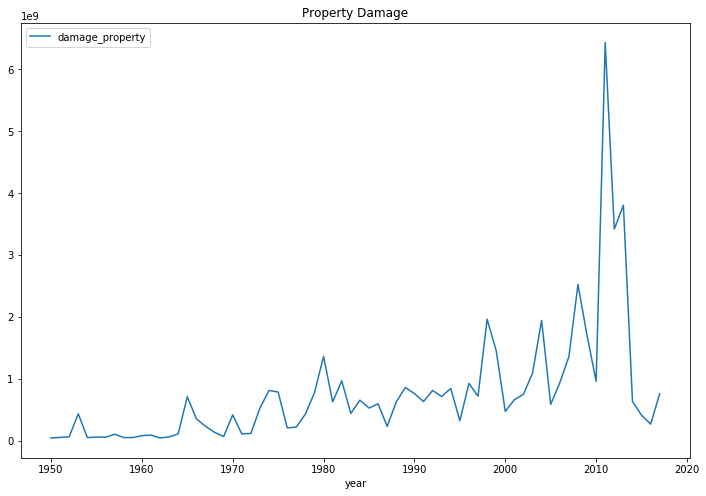

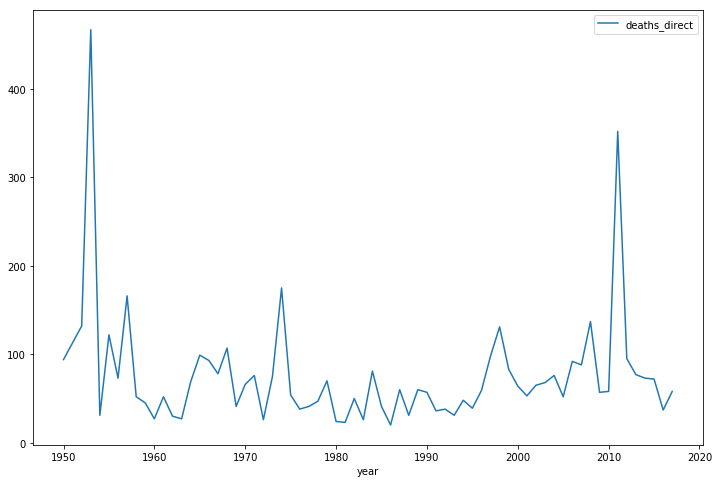

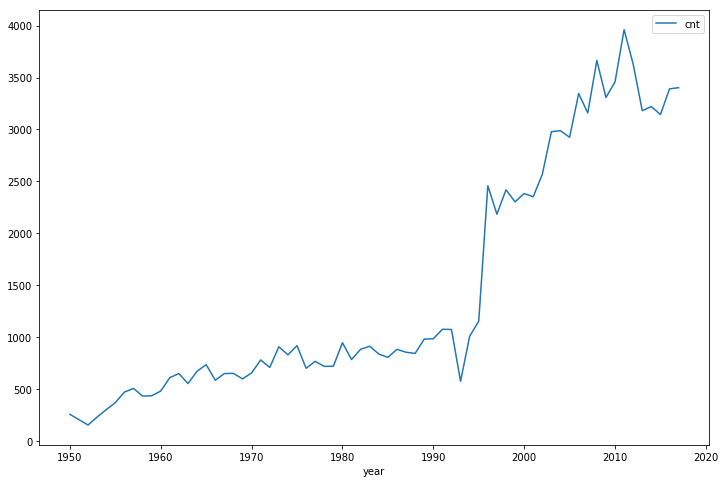

In [58]:
df_yr_all.plot(x='year',y='damage_property',figsize=(12,8),title='Property Damage');
df_yr_all.plot(x='year',y='deaths_direct',figsize=(12,8), title='Deaths due directly to storms');
df_yr_all.plot(x='year',y='cnt',figsize=(12,8));


## Feature Cleaning and Transformation

1. GDP Adjustment 
2. Population Adjustment
3. Duplicate Storms Records
4. Fujitsu Scale Comparison
5. Severity Adjustment
6. Log Adjustment to Damage

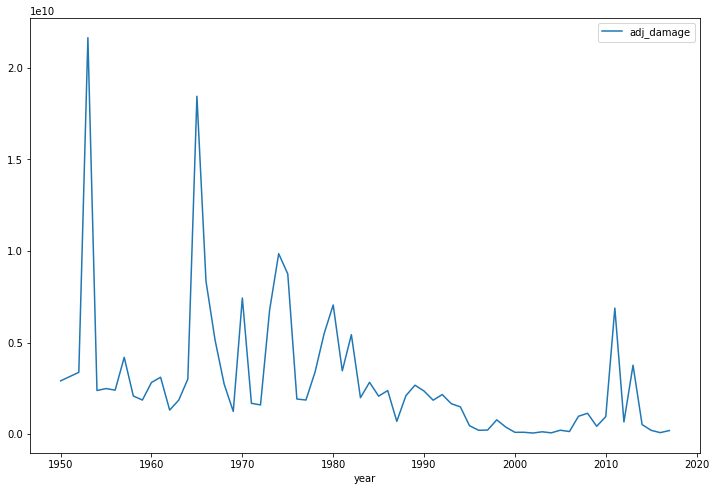

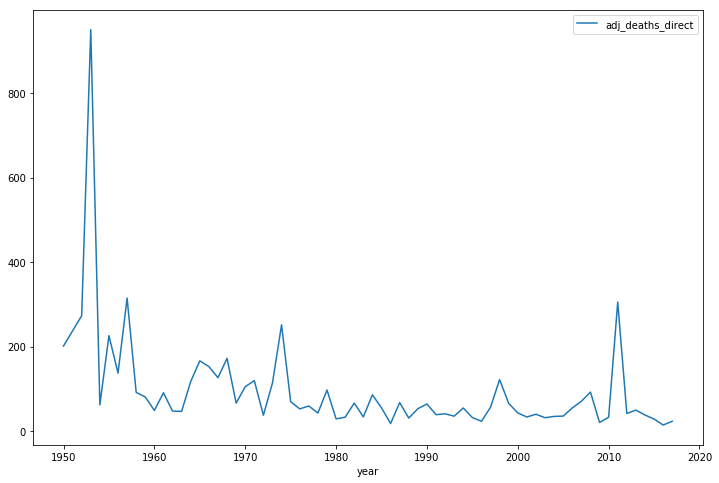

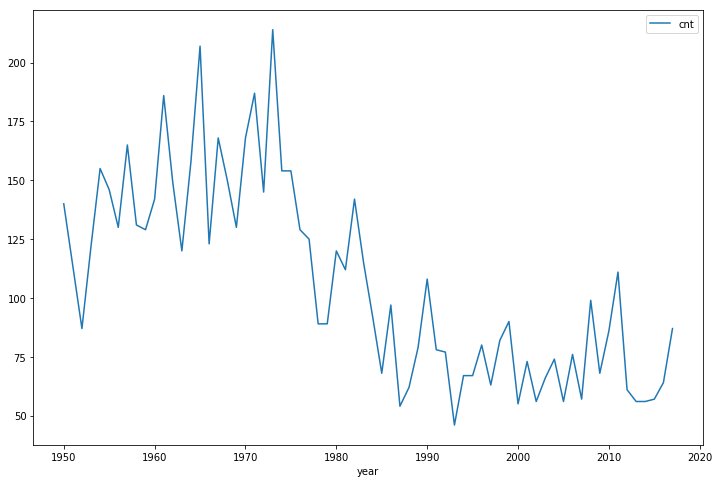

In [57]:
df_yr.plot(x='year',y='adj_damage',figsize=(12,8));
df_yr.plot(x='year',y='adj_deaths_direct',figsize=(12,8));
df_yr.plot(x='year',y='cnt',figsize=(12,8));

In [12]:
pd.crosstab(eda.df['decade'],eda.df['severity'])

severity,A,B,C,D
decade,,,,
1948-1957,1887,329,83,12
1958-1967,5217,496,102,17
1968-1977,7235,260,41,6
1978-1987,7863,401,95,12
1988-1997,7857,339,93,6
1998-2007,6537,90,14,1
2008-2017,30615,168,32,7


In [13]:
pd.crosstab(eda.df['decade'],eda.df['conv_f_scale'])

conv_f_scale,F0,F1,F2,F3,F4,F5
decade,,,,,,
1948-1957,575,791,639,205,88,13
1958-1967,2802,1517,1121,312,71,9
1968-1977,4061,1925,1122,338,81,15
1978-1987,5422,1971,706,213,55,4
1988-1997,9492,2139,498,162,59,8
1998-2007,23611,3132,447,181,48,9
2008-2017,30130,3480,521,168,50,6


In [40]:
two_df 

,Type,Early,Late,p_value,fifth,ninetyfifth
0,tor_rate,141.0,72.0,0.00,122.0,161.0
1,high_f_rate,9.0,5.0,0.12,4.0,14.0
2,death_rate,78.0,73.0,0.31,64.0,93.0
3,damage_rate,0.8,0.7,0.46,0.0,2.0


In [39]:
rec_df

,Type,Early,Late,p_value,fifth,ninetyfifth
0,tor_rate,112.0,74.0,0.00,95.0,130.0
1,high_f_rate,8.0,5.0,0.19,4.0,13.0
2,death_rate,71.0,101.0,1.00,57.0,85.0
3,adj_death_rate,111.7,105.7,0.28,95.0,129.0
4,adj_damage_rate,0.5,2.4,0.99,0.0,2.0


## Result of Hypothesis Testing

- The incidence of severe storms as measured by winds in excess of 112mpg (F2+ on Fujita Scale) is significantly different in both the two epoch and recent epoch test at an alpha of 5%, implying a p-value of 2.5%.  Therefore I reject the null hypothesis. However, the direction of the difference is the opposite to my original alternate hypothesis: the rate of sever storms has significantly declined.


- The rate of deaths per year due to severe storms was not sufficiently different in the two epoch test to reject the null hypothesis.  In the recent epoch test, the unadjusted rate of deaths was significantly higher, but when adjusted for population growth the difference was not significantly different.  This is open for intepretation, but I conclude that I cannot reject the null hypothesis.  Severe storms are not deadlier in aggregate than in the past.


- The effect of property and crop damage per year as a result of severe storms indicated a p_value of 0.46 in the two epoch test, an indication that I cannot reject the null hypothesis on that basis.  However, the indicated p-value for the recent epoch is 0.01.  This is below the indicated alpha of 0.05, therefore I can reject the null hypothesis using that time period.  The damage due to severe storms is greater in the past decade than during the previous sixty years. 

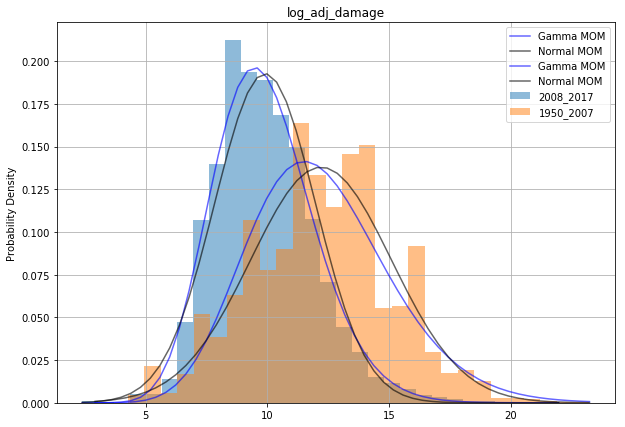

In [46]:
cnt = method_of_moments()
cnt.fit(eda.df[(eda.df['log_adj_damage']>0)&condition_2008_2017],'log_adj_damage')
cnt.plot_pdf(description='2008_2017');
cnt2 = method_of_moments()
cnt2.fit(eda.df[(eda.df['log_adj_damage']>0)&condition_1950_2007],'log_adj_damage')
cnt2.plot_pdf(description='1950_2007');

In [56]:
pd.crosstab(eda.df['decade'],eda.df['conv_f_scale'])
pd.crosstab(eda.df['decade'],eda.df['severity'])

conv_f_scale,F0,F1,F2,F3,F4,F5
decade,,,,,,
1948-1957,575,791,639,205,88,13
1958-1967,2802,1517,1121,312,71,9
1968-1977,4061,1925,1122,338,81,15
1978-1987,5422,1971,706,213,55,4
1988-1997,9492,2139,498,162,59,8
1998-2007,23611,3132,447,181,48,9
2008-2017,30130,3480,521,168,50,6


severity,A,B,C,D
decade,,,,
1948-1957,1887,329,83,12
1958-1967,5217,496,102,17
1968-1977,7235,260,41,6
1978-1987,7863,401,95,12
1988-1997,7857,339,93,6
1998-2007,6537,90,14,1
2008-2017,30615,168,32,7


## Conclusions

- The incidence, as measured by number of storms appears to have gone down.  This is the opposite of my original intuition.  However, I believe that the greater number of total deaths and the larger dollar figures may have influenced that intuition.  This is why I tested.


- That said, the incidence of smaller storms appears to have increased.  It may be real, may be classification, or may be an artifact of measurement.


- The increase in the amount of damage done due to storms in the last decade is profound, a quadrupling of the yearly rate.  This may be due to storms hitting more populous areas, greater focus on damage claims or some other factor.



## What I learned from this process


- Even when your data comes from a reliable source, the method of collection and definitional changes must be addressed.  Data can be made to lie.


- Maintaining a sound feature pipeline is paramount.  Segregating process from data to allow for repeatability parallel processing greatly decreases time spent and aggravation.  


- Data is times' fool.  Population has more than **doubled**.  GDP has grown by **70X** since 1950.  


- Don't add logged numbers.  e^10 + e^15 != e^25